### https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

### https://towardsdatascience.com/time-series-from-scratch-moving-averages-ma-theory-and-implementation-a01b97b60a18

#### Moving Average simply means the average of previous X periods and X is for you to determine. This is one of the most commonly used techniques/concepts for time series data. It can help to smooth out the data trend and thus give you a more realistic approximation of the result.

In [333]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from sklearn.metrics import mean_absolute_error

In [304]:
df = pd.read_excel("D:\Άκης\Data_Science\Deree\ITC6002A1 - EXPLORING AND ANALYZING DATA\Final_Project\data\Gold-Historical-Prices-1-2.xlsx"
                  ,sheet_name="Gold Historical Data")

In [305]:
df = df[['Price', "Date"]]
df = df[df.Price.notna()]
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)
df_1980 = df[df.index.year == 1980]
df_1981 = df[df.index.year == 1981]

## Predict stocks for 1980 based on January

In [309]:
total_working_days = 0
for i in range(0,12):
    print("Month:", i+1,df_1980[df_1980.index.month == i+1].shape[0], "working days.")
    total_working_days =  total_working_days + df_1980[df_1980.index.month == i+1].shape[0]
print("Number of working days", total_working_days)

Month: 1 23 working days.
Month: 2 21 working days.
Month: 3 21 working days.
Month: 4 22 working days.
Month: 5 22 working days.
Month: 6 21 working days.
Month: 7 23 working days.
Month: 8 21 working days.
Month: 9 22 working days.
Month: 10 23 working days.
Month: 11 20 working days.
Month: 12 23 working days.
Number of working days 262


In [310]:
#Working days except first month 
days_to_create_index = total_working_days - df_1980[df_1980.index.month == 1].shape[0]
#Separate January of the Year
df_jan = df_1980[df_1980.index.month == 1]
df_other_months = df_1980[df_1980.index.month != 1]

In [324]:
df_for_pred = pd.concat([df_jan, pd.DataFrame(index=df_other_months.index)])

for i in range(len(df_other_months)):
    try:
        if df_for_pred["Price"].isna().sum() >0:
            df_for_pred[f"Predicted_Price"] = pd.DataFrame(df_for_pred[f"Price"].rolling(window=3, min_periods=1).mean())
            #df_for_pred[df_for_pred["Predicted_Price"].notna()]["Predicted_Price"][-2:]
            idx = df_for_pred[df_for_pred["Predicted_Price"].notna()]["Predicted_Price"][-2:].index.values
            df_for_pred.loc[idx,'Price'] = df_for_pred.loc[idx,'Predicted_Price']
    except:
        pass

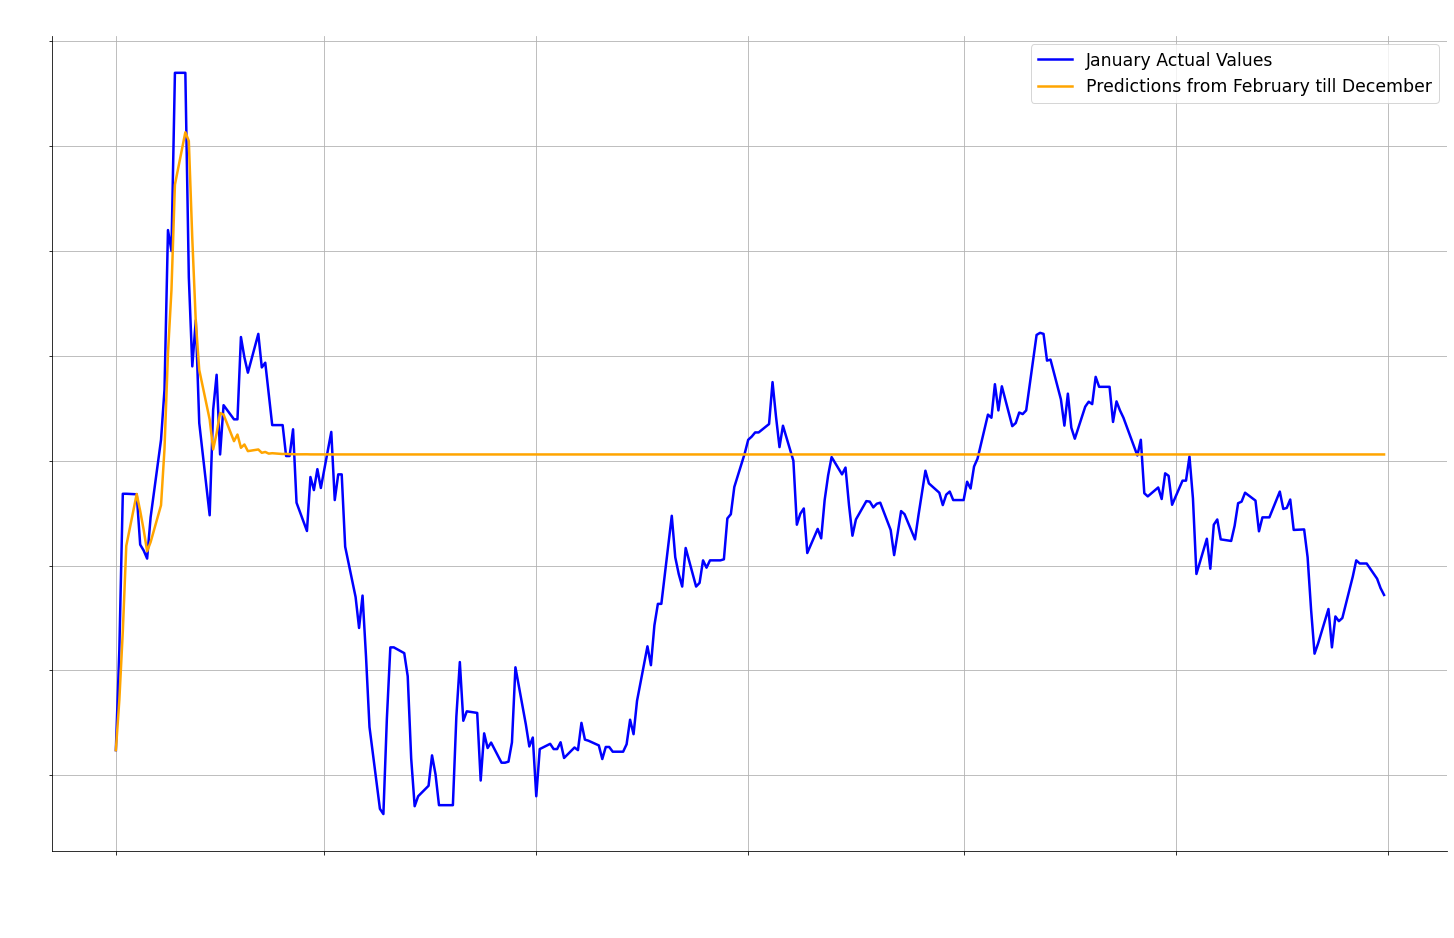

In [325]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1980["Price"], color = "blue",label='January Actual Values')
plt.plot(df_for_pred["Predicted_Price"], color = "orange",label='Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [321]:
df_for_pred

,Price,Predicted_Price
Date,,
1980-01-01,512.00,512.000000
1980-01-02,559.75,535.875000
1980-01-03,634.25,568.666667
1980-01-04,634.25,609.416667
1980-01-07,634.00,634.166667
...,...,...
1980-12-25,653.00,653.000000
1980-12-26,653.00,653.000000
1980-12-29,653.00,653.000000


In [326]:
mse = mean_absolute_error(df_other_months['Price'],
                    df_for_pred[df_for_pred["Predicted_Price"].index.month != 1]["Predicted_Price"])

rmse = np.sqrt(mse)

print("Mean Squered Error: ", mse)
print("Root Mean Squered Error: ", rmse)

Mean Squered Error:  56.9236712212343
Root Mean Squered Error:  7.544777744985885


## Predict stocks for 1981 based on January

In [327]:
total_working_days = 0
for i in range(0,12):
    print("Month:", i+1,df_1981[df_1981.index.month == i+1].shape[0], "working days.")
    total_working_days =  total_working_days + df_1981[df_1981.index.month == i+1].shape[0]
print("Number of working days", total_working_days)

Month: 1 22 working days.
Month: 2 20 working days.
Month: 3 22 working days.
Month: 4 22 working days.
Month: 5 21 working days.
Month: 6 22 working days.
Month: 7 23 working days.
Month: 8 21 working days.
Month: 9 22 working days.
Month: 10 22 working days.
Month: 11 21 working days.
Month: 12 23 working days.
Number of working days 261


In [328]:
#Working days except first month 
days_to_create_index = total_working_days - df_1981[df_1981.index.month == 1].shape[0]
#Separate January of the Year
df_jan = df_1981[df_1981.index.month == 1]
df_other_months = df_1981[df_1981.index.month != 1]

In [329]:
df_for_pred = pd.concat([df_jan, pd.DataFrame(index=df_other_months.index)])

for i in range(len(df_other_months)):
    try:
        if df_for_pred["Price"].isna().sum() >0:
            df_for_pred[f"Predicted_Price"] = pd.DataFrame(df_for_pred[f"Price"].rolling(window=3, min_periods=1).mean())
            #df_for_pred[df_for_pred["Predicted_Price"].notna()]["Predicted_Price"][-2:]
            idx = df_for_pred[df_for_pred["Predicted_Price"].notna()]["Predicted_Price"][-2:].index.values
            df_for_pred.loc[idx,'Price'] = df_for_pred.loc[idx,'Predicted_Price']
    except:
        pass

In [262]:
df_for_pred

,Price,Predicted_Price
Date,,
1981-01-01,586.00,586.000000
1981-01-02,586.00,586.000000
1981-01-05,597.50,589.833333
1981-01-06,599.25,594.250000
1981-01-07,585.00,593.916667
...,...,...
1981-12-25,506.50,506.500000
1981-12-28,506.50,506.500000
1981-12-29,506.50,506.500000


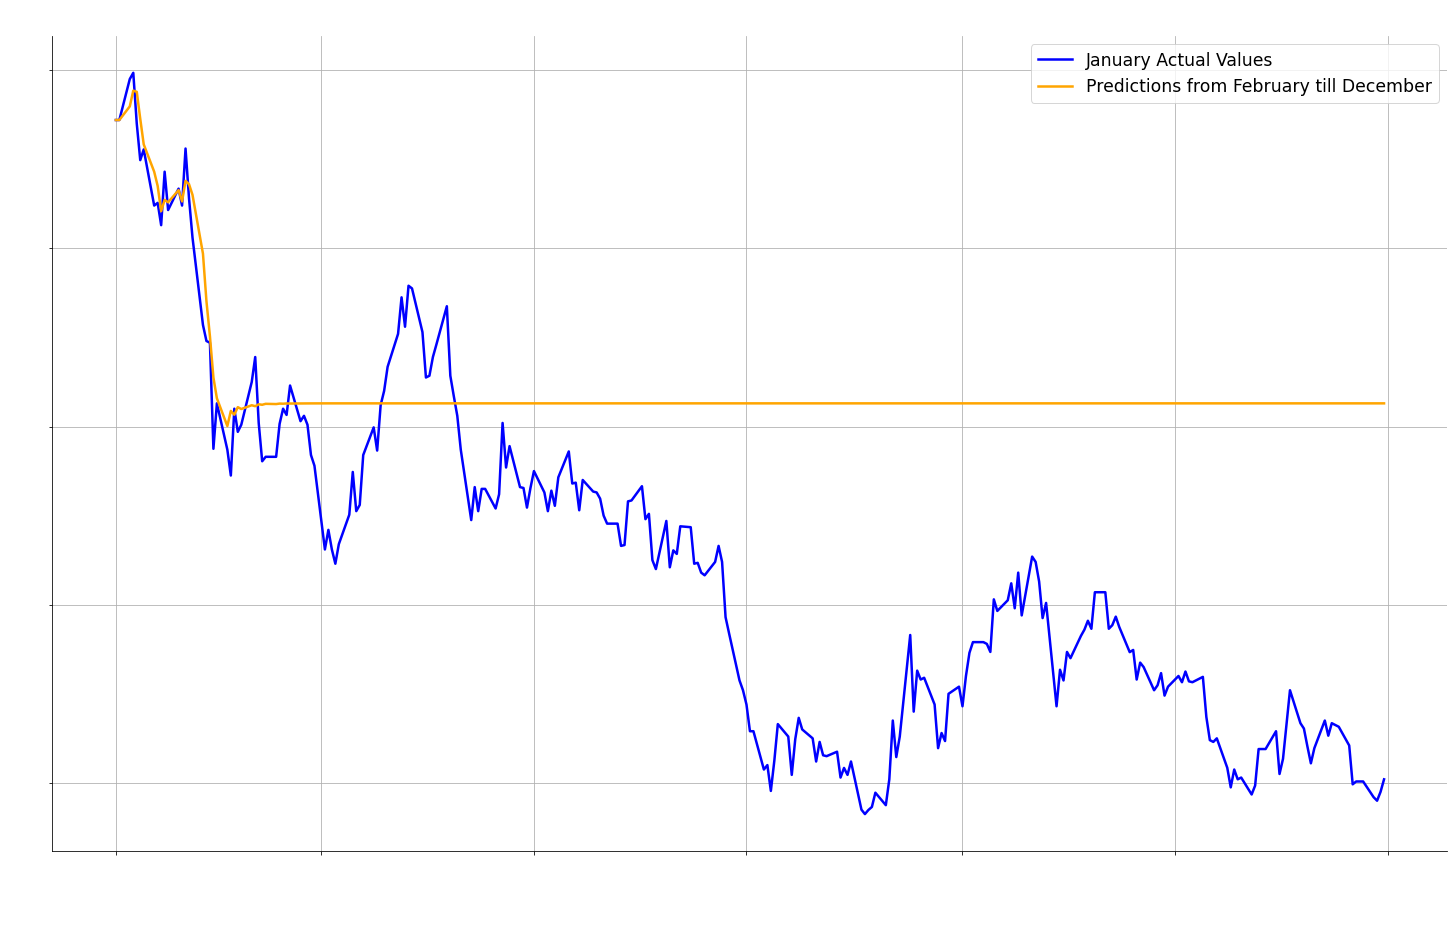

In [332]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Plot
plt.figure(figsize=(25,15))
plt.plot(df_1981["Price"], color = "blue",label='January Actual Values')
plt.plot(df_for_pred["Predicted_Price"], color = "orange",label='Predictions from February till December')

plt.title('Stocks dataset', size=30, color="w")
plt.grid()
plt.xticks(color="w", size=20, rotation=45)
plt.yticks(color="w", size=20)
plt.legend(fontsize='xx-large')
plt.show()

In [331]:
mse = mean_absolute_error(df_other_months['Price'],
                    df_for_pred[df_for_pred["Predicted_Price"].index.month != 1]["Predicted_Price"])

rmse = np.sqrt(mse)

print("Mean Squered Error: ", mse)
print("Root Mean Squered Error: ", rmse)

Mean Squered Error:  58.59678318660121
Root Mean Squered Error:  7.6548535705525556
